Information on data in python that may be useful: 
Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing. While a statically-typed language like C or Java requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. 

The standard Python implementation is written in C. This means that every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well.

Because of Python's dynamic typing, we can even create heterogeneous lists, but this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. 

In [28]:
import numpy as np 

#integer array
np.array([1,4,2,5,3])

#set data type of array
np.array([1,2,3,4,5], dtype='float32')

#Unlike python lists, NumPy arrays can be mulit-dimensional
#Initialize mulit-dimensional array - in the list [2,5,6] each number in that list is the start of 
np.array([range(i, i+3) for i in [2,5,6]])


array([[2, 3, 4],
       [5, 6, 7],
       [6, 7, 8]])

In [29]:
#More efficient to create arrays from scratch using NumPy functions

#create 3x5 floating-point array filled with ones
np.ones((3,5), dtype=float)

#create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

#create 3x5 array filled with 3.14
np.full((3,5), 3.14)

# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[9, 9, 8],
       [9, 3, 9],
       [1, 5, 9]])

Array Attributes
Attributes of arrays: Determining the size, shape, memory consumption, and data types of arrays
Indexing of arrays: Getting and setting the value of individual array elements
Slicing of arrays: Getting and setting smaller subarrays within a larger array
Reshaping of arrays: Changing the shape of a given array
Joining and splitting of arrays: Combining multiple arrays into one, and splitting one array into many

random.seed() is a function in the Python random module that is used to initialize the random number generator with a specific seed value. The seed value determines the initial state of the random number generator, which in turn influences the sequence of random numbers generated.

Here's how random.seed() works:

Setting the Seed: By calling random.seed(), you provide a seed value as an argument. This seed value can be an integer, a string, or an object that can be converted into an integer.

Deterministic Behavior: Setting the seed value ensures that the sequence of random numbers generated by the random number generator is reproducible. If you run the same code with the same seed value, you'll get the same sequence of random numbers every time.

Unpredictability: While setting the seed value makes the sequence of random numbers reproducible, the sequence itself remains unpredictable and statistically random. In other words, knowing the seed value does not allow you to predict the sequence of random numbers.

In [ ]:
#Define three random arrays: one-dimensional, two-dimensional, three-dimemnsional

import numpy as np 

np.random.seed

x1 = np.random.randint(10) #1D
x2 = np.random.randint(0, 10, (3, 4)) #2D
x3 = np.random.randint(0, 10, (3, 4, 5)) #3D

#each array has attributes
x2.shape #size of each dimension
x2.ndim #number of dimensions 
x2.size #total size of array 

#itemsize lists the size (in bytes) of each array element, and nbytes which lists the total size (in bytes) of the array 
#array indexing: array[i] = array([i0, i1, i2,...])
#negative indexing can be used to index from the end of the array
x1[-2]

#array slicing: 
#x[start:stop:step], default to the alues start=0, stop=size oof dimension, step=1
x1[:3] #first three elements
x1[3:] #elements after index 3
x1[1:4] #middle subarray
x1[::2] #every second element
x1[1::2] #every second element, starting at index 1
x1[::-1] #all elements, reversed
x1[4::-2] #every second element from index 4, reversed

#multidimensional subarrays
x2[:2, :3] #first two rows & three columns
x2[:3, ::2] #three rows, every second column
x2[::-1, ::-1] #all rows and columns, reversed 

#accessing single rows or columns of an array via combining indexing and slicing 
x2[:, 0] #first column of x2
x2[, 0] #DOES NOT WORK, only works for the case of rows 
x2[0] # shorthand for x2[0, :]

#NumPy arrays support the concept of views, which are alternative array representations that share the same data buffer with the original array. These views do not create a new copy of the data but provide a different way to access and manipulate the underlying data.

#If we modify subarrays created from a view, the original data will change

In [55]: x2
Out[55]:
array([[1, 7, 7, 0],
       [0, 1, 0, 9],
       [6, 8, 4, 3]])

In [56]: x2_sub = x2[:2, :2]

In [57]: x2_sub
Out[57]:
array([[1, 7],
       [0, 1]])

In [58]: x2_sub[0, 0] = 0

In [59]: x2
Out[59]:
array([[0, 7, 7, 0],
       [0, 1, 0, 9],
       [6, 8, 4, 3]])


#On the other hand, copying an array in NumPy creates a new array object with its own separate data buffer. Any modifications made to the copied array do not affect the original array, and vice versa. 
x2_sub_copy = x2[:2, :2].copy()





(3, 4)

np.reshape() is a function in NumPy used to change the shape of an array without changing its data. It allows you to transform arrays into different shapes, provided that the total number of elements remains the same.

Here's how np.reshape() works:

Syntax: The syntax for np.reshape() is np.reshape(a, new_shape, order='C'), where:

a: The array to be reshaped.
new_shape: The new shape that you want to assign to the array. This can be specified as a tuple of integers or as a single integer if the array has only one dimension.
order (optional): Specifies the order in which the elements of the array are read and reshaped. It can be 'C' (row-major order, default) or 'F' (column-major order).
Reshaping: np.reshape() rearranges the elements of the input array according to the new shape specified. The total number of elements in the reshaped array must match the total number of elements in the original array.

Data Sharing: np.reshape() creates a new view of the array with the specified shape, but it does not copy the data. It shares the same underlying data buffer with the original array. Therefore, modifying elements of the reshaped array will also affect the original array, and vice versa.

In [ ]:
#Reshaping of arrays 
In [69]: grid = np.arange(0, 10)

In [70]: grid
Out[70]: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]: grid = grid.reshape(2,5)

In [73]: grid
Out[73]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])


np.newaxis is a constant in NumPy that serves as a tool for array manipulation. It is not a function but rather a convenient way to increase the dimensionality of an array by one. When used in array indexing or slicing operations, np.newaxis inserts a new axis into the array at the specified position.

Here's what np.newaxis does:

Inserting New Axes: It inserts a new axis into the array at the specified position, effectively increasing the dimensionality of the array by one.

Reshaping Arrays: It facilitates reshaping operations by allowing you to explicitly control the dimensions of arrays.

Broadcasting: It plays a crucial role in broadcasting operations, where NumPy automatically aligns the shapes of arrays to perform element-wise operations efficiently.

For example, if you have a 1D array and you want to reshape it into a column vector (2D array), you can use np.newaxis to insert a new axis along the second dimension, effectively converting the 1D array into a column vector.

In [ ]:
#can use np.newaxis to create a new column/row during splicing
In [74]: x1
Out[74]: array([2, 3, 2, 1, 1, 0, 4, 7, 6, 7])

In [77]: gridB = x1[:, np.newaxis]

In [78]: gridB
Out[78]:
array([[2],
       [3],
       [2],
       [1],
       [1],
       [0],
       [4],
       [7],
       [6],
       [7]])

np.concatenate() is a NumPy function used to concatenate arrays along a specified axis. It allows you to combine arrays into a single array along the specified axis.

Here's how np.concatenate() works:

Syntax: np.concatenate((array1, array2, ...), axis=0)
array1, array2, ...: A sequence of arrays to be concatenated. All arrays must have the same shape along the specified axis, except for the dimension being concatenated.
axis: (Optional) The axis along which the arrays will be concatenated. If not provided, the default value is 0, which means the arrays will be concatenated along the first axis.
Key points:

Dimensionality: All arrays being concatenated must have the same shape along the axis being concatenated, except for the dimension being concatenated.

Axis: The axis parameter specifies the axis along which the concatenation will be performed. Concatenating along axis 0 means stacking arrays vertically (along rows), while concatenating along axis 1 means stacking arrays horizontally (along columns).

Resulting Shape: The resulting shape of the concatenated array depends on the axis along which the concatenation is performed. For example, if concatenating along axis 0, the resulting array will have a shape where the size of the axis being concatenated increases. If concatenating along axis 1, the resulting array will have a shape where the number of arrays being concatenated increases.

Data Types: np.concatenate() preserves the data type of the arrays being concatenated. If the arrays being concatenated have different data types, the resulting array will have a data type that can accommodate all the different data types (upcasting).

In [ ]:
#can combine multiple arrays into one, and to split single array into multiple arrays 
#routines np.concatenate, np.vstack, np.hstack

#Can concatenate one-dimensional arrays
In [126]: x1a
Out[126]: array([ 0,  2,  4,  6,  8, 11, 13, 15, 17, 20])

In [127]: x1
Out[127]: array([2, 3, 2, 1, 1, 0, 4, 7, 6, 7])

In [134]: np.concatenate([x1, x1a])
Out[134]:
array([ 2,  3,  2,  1,  1,  0,  4,  7,  6,  7, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])

#Can concatenate two-dimensional arrays 
In [135]: grid
Out[135]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [136]: %who
blub     grid    gridB   np      x       x1      x1a     x2      x2_sub
x2_sub_copy      x3D     xBig

In [137]: gridB
Out[137]:
array([[2],
       [3],
       [2],
       [1],
       [1],
       [0],
       [4],
       [7],
       [6],
       [7]])

In [138]: gridB = gridB.reshape(2, 5)

In [139]: gridB
Out[139]:
array([[2, 3, 2, 1, 1],
       [0, 4, 7, 6, 7]])

In [140]: grid
Out[140]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [141]: gridB
Out[141]:
array([[2, 3, 2, 1, 1],
       [0, 4, 7, 6, 7]])

In [146]: np.concatenate([grid, gridB], axis=0) #concatenat along first axis 
Out[146]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [2, 3, 2, 1, 1],
       [0, 4, 7, 6, 7]])

In [147]: np.concatenate([grid, gridB], axis=1) #concatenate along second axis (zero-indexed)
Out[147]:
array([[0, 1, 2, 3, 4, 2, 3, 2, 1, 1],
       [5, 6, 7, 8, 9, 0, 4, 7, 6, 7]])


Horizontal stacking refers to the process of joining arrays along their horizontal axis. In two-dimensional arrays, the horizontal axis is typically the axis representing columns. When you horizontally stack arrays, you are essentially appending one array to the right of another array.

For example, consider two arrays A and B:

A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]
If you horizontally stack A and B, you'll get:

[[1, 2, 5, 6],
 [3, 4, 7, 8]]
Here, the elements of B are appended to the right of the elements of A, resulting in a new array where each row contains the elements from both arrays.

In NumPy, np.hstack() is used to perform horizontal stacking. It takes a sequence of arrays and joins them along the horizontal axis to create a new array. The arrays being stacked must have compatible shapes along all dimensions other than the second one.

In [ ]:
#hstack example 
In [168]: grid
Out[168]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [169]: x1b
Out[169]: array([7, 6, 7, 4, 0])

In [170]: x1b[:2]
Out[170]: array([7, 6])

In [171]: np.hstack([x1b[:2].reshape(2,1), grid])
Out[171]:
array([[7, 0, 1, 2, 3, 4],
       [6, 5, 6, 7, 8, 9]])

Vertical stacking refers to the process of joining arrays along their vertical axis. In two-dimensional arrays, the vertical axis is typically the axis representing rows. When you vertically stack arrays, you are essentially appending one array below another array.

For example, consider two arrays A and B:

A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]
If you vertically stack A and B, you'll get:

[[1, 2],
 [3, 4],
 [5, 6],
 [7, 8]]
 
Here, the elements of B are appended below the elements of A, resulting in a new array where each column contains the elements from both arrays.

In NumPy, np.vstack() is used to perform vertical stacking. It takes a sequence of arrays and joins them along the vertical axis to create a new array. The arrays being stacked must have compatible shapes along all dimensions other than the first one.

In [ ]:
#vstack example
In [161]: x1b
Out[161]: array([7, 6, 7, 4, 0])

In [162]: grid
Out[162]:
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [163]: np.vstack([x1b, grid])
Out[163]:
array([[7, 6, 7, 4, 0],
       [0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Opposite of concatenating is splitting: np.split, np.hsplit, hp.vsplit 

In [ ]:
In [220]: x1
Out[220]: array([2, 3, 2, 1, 1, 0, 4, 7, 6, 7])

In [221]: a1, a2, a3 = np.split(x1, [4, 8], axis = 0 ) #[4, 8] is the element in the array start:stop, axis zero is vertical split

In [223]: print(a1, a2, a3)
[2 3 2 1] [1 0 4 7] [6 7]

In [232]: x3Da
Out[232]:
array([[95, 96, 69, 81,  8, 30, 74, 18,  5, 97],
       [ 1, 53, 33,  4,  1, 69, 67, 43, 95, 92],
       [25, 73, 49, 84, 60, 14, 72, 33, 36, 55],
       [61, 54, 30, 24, 37, 98, 66, 10, 37, 50],
       [36, 13, 45, 43, 25, 21, 64, 28, 90, 27]])

#horizontal split
In [244]: left, right = np.hsplit(x3Da, [5])
In [246]: print(left)
[[95 96 69 81  8]
 [ 1 53 33  4  1]
 [25 73 49 84 60]
 [61 54 30 24 37]
 [36 13 45 43 25]]

#vertical split 
In [240]: upper, lower = np.vsplit(x3Da, [3])
In [241]: print(upper)
[[95 96 69 81  8 30 74 18  5 97]
 [ 1 53 33  4  1 69 67 43 95 92]
 [25 73 49 84 60 14 72 33 36 55]]

#default axis zero appears to be same as vertical split, but vsplit comes down to speed and ease of use 
In [250]: upper, lower = np.split(x3Da, [3], axis=0)
In [251]: upper
Out[251]:
array([[95, 96, 69, 81,  8, 30, 74, 18,  5, 97],
       [ 1, 53, 33,  4,  1, 69, 67, 43, 95, 92],
       [25, 73, 49, 84, 60, 14, 72, 33, 36, 55]])

Aggregation example: Average Height of US Presidents
Using pandas to import a dataset (height of us presidents), we are going to rank the heights of the US presidents
Then we are going to graph a histogram
I'm listening to Slipknot's new album, it's kinda weird.

Mean height:  180.04545454545453
Standard deviation:   6.957515705579717
Minimum height:   163
Maximum height:   193
25th percentile:  174.75
Median:   182.0
75th percentile:  183.5


Text(0, 0.5, 'number')

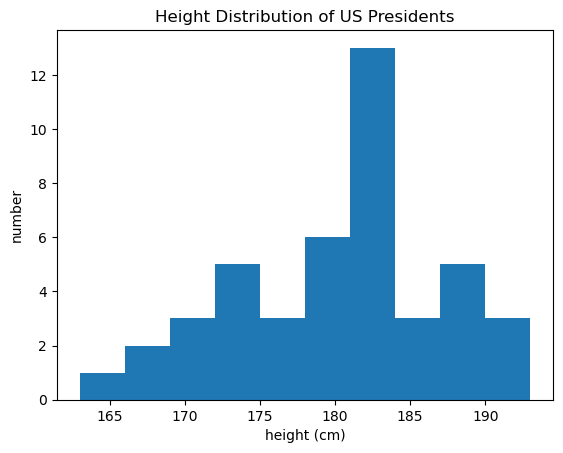

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('.\president_heights.csv')
data_sorted = data.sort_values(by='height(cm)', ascending=False)
heights = np.array(data['height(cm)'])

print("Mean height: ", heights.mean())
print("Standard deviation:  ", heights.std())
print("Minimum height:  ", heights.min())
print("Maximum height:  ", heights.max())
print("25th percentile: ", np.percentile(heights,25))
print("Median:  ", np.median(heights))
print("75th percentile: ", np.percentile(heights,75))

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')


In [6]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np

data = pd.read_csv('.\Colorado_Fourteeners_1564_33.csv', encoding='latin1')
data_sorted = data.sort_values(by='Distance_mi', ascending=False)
data_sorted


,Unnamed: 0,ID,Mountain.Peak,Mountain.Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard.Route,Distance_mi,Elevation.Gain_ft,Difficulty,Traffic.Low,Traffic.High,photo
29,30,30,Pikes Peak,Front Range,14115,Y,5530,60.80,38.840500,-105.044200,East Slopes,26.00,7500,Class 1,15000,20000,https://www.14ers.com/photos/pikespeak/peakpho...
30,31,31,Snowmass Mountain,Elk Mountains,14099,Y,1152,2.34,39.118800,-107.066500,East Slopes,22.00,5800,Hard Class 3,1000,3000,https://www.14ers.com/photos/snowmassmtn/peakp...
32,33,33,Mount Eolus,San Juan Mountains,14090,Y,1024,1.69,37.621800,-107.622700,Northeast Ridge,17.00,6100,Class 3,3000,5000,https://www.14ers.com/photos/windomgroup/peakp...
28,29,29,Capitol Peak,Elk Mountains,14137,Y,1750,7.44,39.150300,-107.082900,Northeast Ridge,17.00,5300,Class 4,1000,3000,https://www.14ers.com/photos/capitolpeak/peakp...
38,39,39,Sunlight Peak,San Juan Mountains,14065,Y,399,0.48,37.627400,-107.595900,South Face,17.00,6000,Class 4,3000,5000,https://www.14ers.com/photos/windomgroup/peakp...
41,42,42,Ellingwood Point,Sangre de Cristo Range,14048,Y,342,0.52,37.582600,-105.492700,South Face,17.00,6200,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
31,32,32,Windom Peak,San Juan Mountains,14093,Y,2187,26.40,37.621200,-107.591900,West Ridge,17.00,6000,Hard Class 2,3000,5000,https://www.14ers.com/photos/windomgroup/peakp...
3,4,4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.577500,-105.485600,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
56,57,57,North Eolus,San Juan Mountains,14039,N,199,0.25,37.625192,-107.621187,South Ridge,16.75,6000,Class 3,3000,5000,https://www.14ers.com/photos/windomgroup/peakp...
10,11,11,Mount Antero,Sawatch Range,14276,Y,2503,17.75,38.674100,-106.246200,West Slopes,16.00,5200,Class 2,3000,5000,https://www.14ers.com/photos/mtantero/peakphot...


Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [ ]:
#Addition of a two-dimensional array to a one-dimensional array

#Example 1 
In [2]: import numpy as np

In [3]: import pandas as pd

In [4]: m = np.ones((2,3))

In [5]: m
Out[5]:
array([[1., 1., 1.],
       [1., 1., 1.]])

In [6]: m = np.ones((2,3), dtype = int)

In [7]: m
Out[7]:
array([[1, 1, 1],
       [1, 1, 1]])

In [8]: n = np.arange(3)

In [9]: n
Out[9]: array([0, 1, 2])

In [11]: m.shape
Out[11]: (2, 3)

In [12]: n.shape
Out[12]: (3,)

In [13]: m+n
Out[13]:
array([[1, 2, 3],
       [1, 2, 3]])

In [14]:

##Example 2
In [14]: a = np.arange(3).reshape((3,1))

In [15]: a
Out[15]:
array([[0],
       [1],
       [2]])

In [16]: n
Out[16]: array([0, 1, 2])

In [17]: a + n
Out[17]:
array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##Example 3, error
In [21]: p = np.ones((3,2), dtype = int)

In [22]: p
Out[22]:
array([[1, 1],
       [1, 1],
       [1, 1]])

In [23]: d = np.arange(3)

In [24]: d
Out[24]: array([0, 1, 2])

In [25]: d + p
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[25], line 1
----> 1 d + p

ValueError: operands could not be broadcast together with shapes (3,) (3,2)

## This one errors out because of the rules of broadcasting : rule 1 states pad shape with ones so that p would remain (3,2) and d would transform to (1,3).
# Then, by rule 2: d would stretch to match p so that p would remain (3,2) and d would transform to (3,3)
# Final shapes do not match and error out 

#Use np.newaxis to reshape the array
In [26]: p
Out[26]:
array([[1, 1],
       [1, 1],
       [1, 1]])

In [27]: d
Out[27]: array([0, 1, 2])

In [28]: d[:, np.newaxis].shape
Out[28]: (3, 1)

In [30]: d[:, np.newaxis]
Out[30]:
array([[0],
       [1],
       [2]])

In [29]: p + d[:,np.newaxis]
Out[29]:
array([[1, 1],
       [2, 2],
       [3, 3]])

In [ ]:
#Broadcasting in practice 
#Subtracting the row-wise mean from an array of data

In [31]: rng = np.random.default_rng(seed=1701)

In [32]: x = rng.random((10,3))

In [33]: x
Out[33]:
array([[0.4020733 , 0.30563311, 0.67668051],
       [0.15821208, 0.79247763, 0.09419469],
       [0.36753944, 0.06388928, 0.96431608],
       [0.35200998, 0.54550343, 0.88597945],
       [0.57016965, 0.26614394, 0.8170382 ],
       [0.55906652, 0.06387035, 0.84877751],
       [0.89414484, 0.18920785, 0.23660015],
       [0.16502896, 0.56583856, 0.29513111],
       [0.29078012, 0.90079544, 0.59992434],
       [0.09133896, 0.00578466, 0.97096222]])

In [34]: xmean = x.mean(axis = 1)

In [35]: xmean
Out[35]:
array([0.46146231, 0.3482948 , 0.46524827, 0.59449762, 0.55111726,
       0.49057146, 0.43998428, 0.34199954, 0.59716664, 0.35602861])

In [36]: xmean = x.mean(axis = 0)

In [37]: xmean
Out[37]: array([0.38503638, 0.36991443, 0.63896043])

In [38]: x_centered = x - xmean

In [39]: x_centered
Out[39]:
array([[ 0.01703691, -0.06428131,  0.03772009],
       [-0.2268243 ,  0.4225632 , -0.54476574],
       [-0.01749695, -0.30602514,  0.32535566],
       [-0.0330264 ,  0.175589  ,  0.24701902],
       [ 0.18513326, -0.10377048,  0.17807777],
       [ 0.17403013, -0.30604408,  0.20981709],
       [ 0.50910846, -0.18070657, -0.40236028],
       [-0.22000743,  0.19592414, -0.34382932],
       [-0.09425626,  0.53088102, -0.03903608],
       [-0.29369742, -0.36412976,  0.33200179]])

#check centered array has mean near zero) 
In [40]: x_centered.mean(axis = 0)
Out[40]: array([ 4.99600361e-17, -4.44089210e-17,  0.00000000e+00])

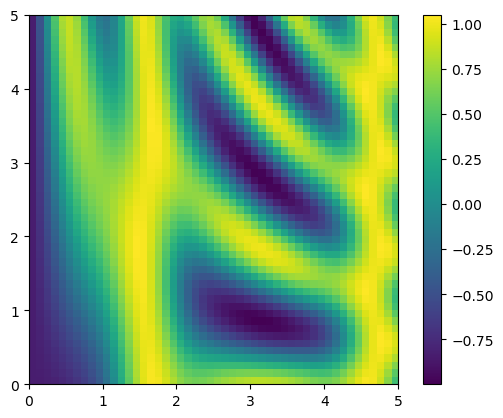

In [1]:
#Plotting two dimensional function 

#x and y have 50 steps from 0 to 5 
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar()